In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("BIKE DETAILS.csv")

In [4]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
df.shape

(1061, 7)

In [6]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [7]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [8]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [9]:
# 1 What is the range of selling prices in the dataset 
selling_price_range = df['selling_price'].min(), df['selling_price'].max()


In [10]:
selling_price_range

(np.int64(5000), np.int64(760000))

In [11]:
# 2 What is the median selling price for bikes in the dataset 

median_selling_price = df['selling_price'].median()


In [12]:
median_selling_price

np.float64(45000.0)

In [13]:
# 3  What is the most common seller type 
most_common_seller_type = df['seller_type'].mode()[0]


In [14]:
most_common_seller_type

'Individual'

In [15]:
# 4 How many bikes have driven more than 50,000 kilometers 
bikes_over_50k_km = df[df['km_driven'] > 50000].shape[0]


In [16]:
bikes_over_50k_km

170

In [17]:
# 5 What is the average km_driven value for each ownership type
average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()



In [18]:
average_km_driven_by_owner

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [19]:
# 6 What proportion of bikes are from the year 2015 or older
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion_2015_or_older = bikes_2015_or_older / total_bikes * 100


In [20]:
bikes_2015_or_older

601

In [21]:
total_bikes

1061

In [22]:
proportion_2015_or_older

56.64467483506126

In [23]:
# 7 What is the trend of missing values across the dataset
missing_values_count = df.isnull().sum()

missing_values_proportion = df.isnull().mean()

# Combine the results into a single DataFrame for better readability
missing_values_trend = pd.DataFrame({
    "Missing Values Count": missing_values_count,
    "Missing Values Proportion (%)": missing_values_proportion * 100
})

In [24]:
missing_values_count


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [25]:
missing_values_proportion

name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64

In [26]:
missing_values_trend

,Missing Values Count,Missing Values Proportion (%)
name,0,0.000000
selling_price,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000
ex_showroom_price,435,40.999057


In [28]:
# 8  What is the highest ex_showroom_price recorded, and for which bike
highest_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_price]

highest_price, bike_with_highest_price[['name', 'ex_showroom_price']]


(np.float64(1278000.0),
                            name  ex_showroom_price
 134  Harley-Davidson Street Bob          1278000.0)

In [29]:
highest_price

np.float64(1278000.0)

In [30]:
bike_with_highest_price

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [31]:
# 9 What is the total number of bikes listed by each seller type
bikes_by_seller_type = df['seller_type'].value_counts()


In [32]:
bikes_by_seller_type

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

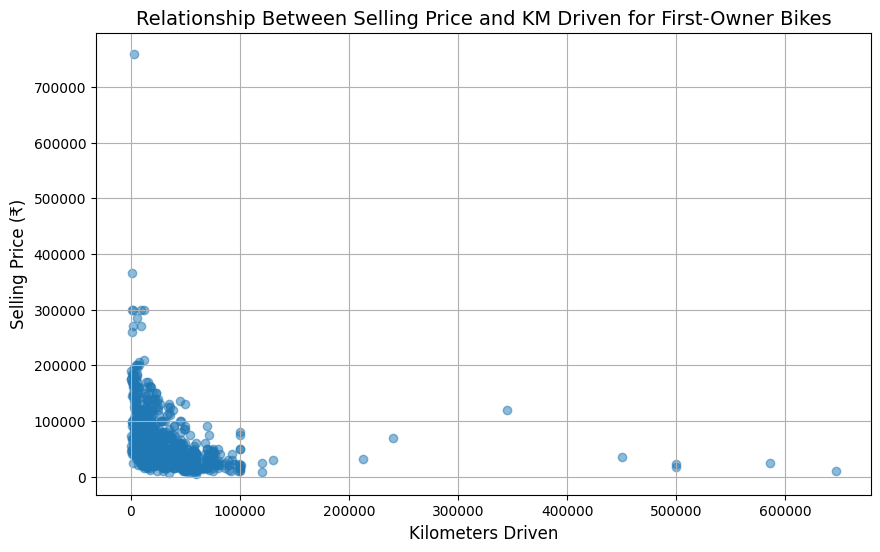

In [33]:
# 10 What is the relationship between selling_price and km_driven for first-owner bikes
import matplotlib.pyplot as plt

first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(10, 6))
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'], alpha=0.5)
plt.title('Relationship Between Selling Price and KM Driven for First-Owner Bikes', fontsize=14)
plt.xlabel('Kilometers Driven', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.grid(True)
plt.show()


In [34]:
# 11 Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

# Remove outliers from the dataset
bike_data_without_outliers = df[~((df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound))]

outliers.shape[0], bike_data_without_outliers.shape[0]


(39, 1022)

In [35]:
lower_bound, upper_bound

(np.float64(-30750.0), np.float64(87250.0))

In [37]:
bike_data_without_outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


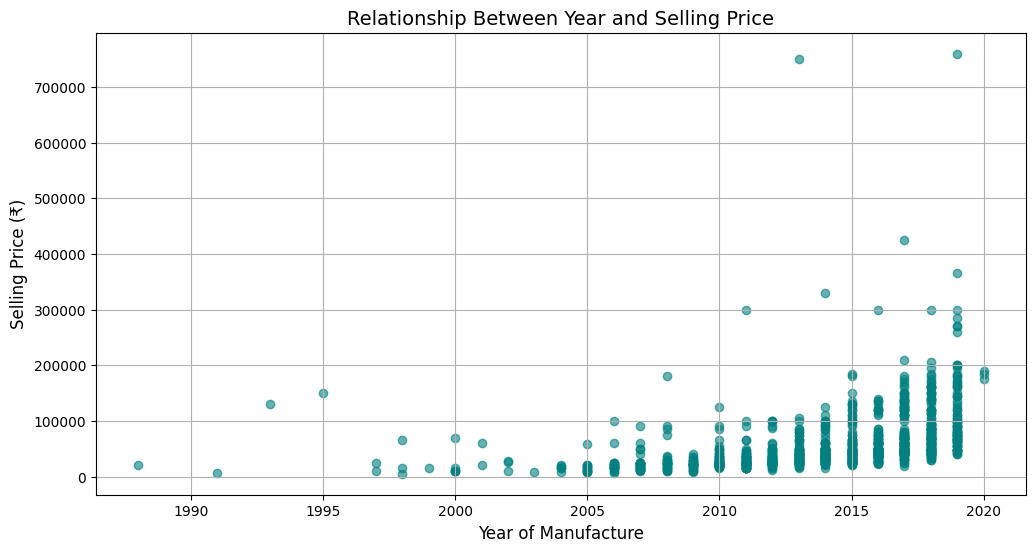

In [39]:
# 12 Perform a bivariate analysis to visualize the relationship between year and selling_price
# Plot the relationship between year and selling_price
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='teal')
plt.title('Relationship Between Year and Selling Price', fontsize=14)
plt.xlabel('Year of Manufacture', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.grid(True)
plt.show()


In [42]:
# 13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
from datetime import datetime

current_year = datetime.now().year

df['age'] = current_year - df['year']

# Calculate the average depreciation per year
average_depreciation = df['selling_price'].sum() / df['age'].sum()



In [43]:
average_depreciation


np.float64(5885.599386103619)

In [44]:
# 14 Which bike names are priced significantly above the average price for their manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average price back into the dataset
df['avg_price_for_year'] = df['year'].map(avg_price_by_year)

# Identify bikes priced significantly above the average price for their manufacturing year (e.g., 1.5x the average price)
threshold_factor = 1.5
above_avg_bikes = df[df['selling_price'] > (df['avg_price_for_year'] * threshold_factor)]

above_avg_bikes[['name', 'year', 'selling_price', 'avg_price_for_year']]


,name,year,selling_price,avg_price_for_year
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
23,Jawa Standard,2019,180000,119689.511628
...,...,...,...,...
979,Royal Enfield Thunder 500,2015,105000,56500.000000
981,Royal Enfield Thunder 350,2013,105000,51136.986301
983,Royal Enfield Classic 350,2015,100000,56500.000000
984,Royal Enfield Classic 500,2014,95000,48668.131868


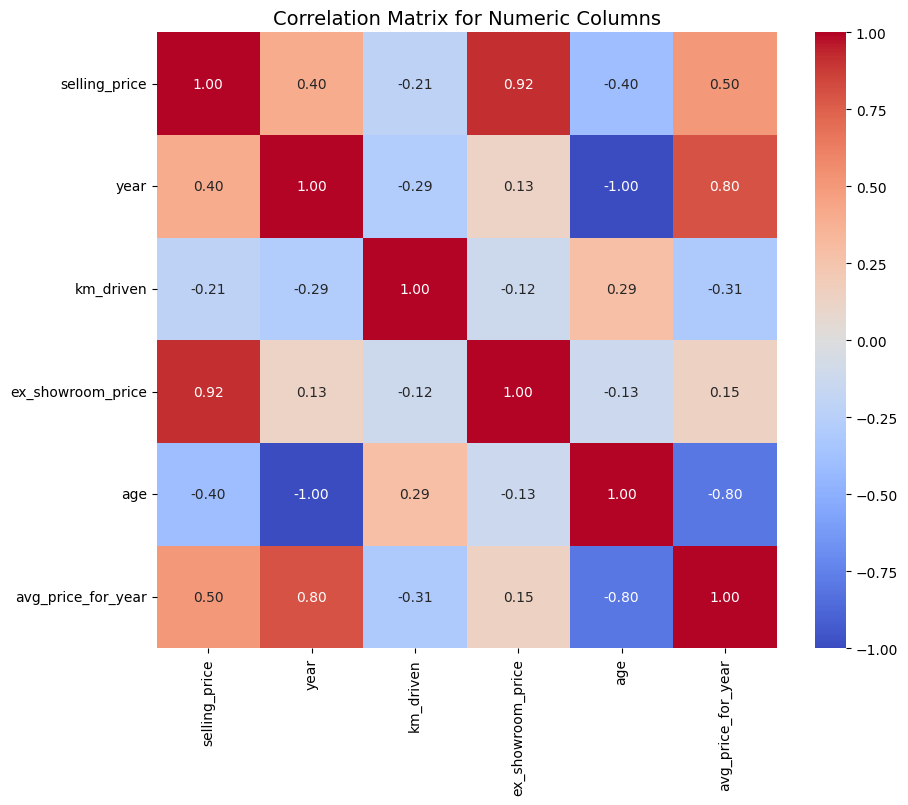

In [46]:
# 15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix for Numeric Columns', fontsize=14)
plt.show()
